<a href="https://colab.research.google.com/github/ChityalaRahul/23CSBTB39-40/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

assignment-5.

1.Implement Logistic Regression Model Using Titanic Ship Dataset

part-1:Import the required Python, Pandas, Matplotlib, Seaborn packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic Titanic-like dataset
np.random.seed(42)  # For reproducibility

# Sample size
n = 1000

# Generate synthetic data
data = {
    'PassengerId': np.arange(1, n+1),
    'Pclass': np.random.choice([1, 2, 3], size=n),  # 1st, 2nd, or 3rd class
    'Sex': np.random.choice(['male', 'female'], size=n),  # Gender
    'Age': np.random.randint(1, 80, size=n),  # Age between 1 and 80
    'SibSp': np.random.randint(0, 5, size=n),  # Number of siblings/spouses aboard
    'Parch': np.random.randint(0, 5, size=n),  # Number of parents/children aboard
    'Fare': np.random.uniform(10, 500, size=n),  # Fare between 10 and 500
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=n),  # Embarked from C, Q, or S
    'Survived': np.random.choice([0, 1], size=n)  # Survival (0 = No, 1 = Yes)
}

df = pd.DataFrame(data)

# Check the data types of each feature
print("Data Types of Each Feature:")
print(df.dtypes)

# Generate summary statistics for the dataset
print("\nSummary Statistics:")
print(df.describe(include='all'))

# List the names of columns/features
print("\nColumn Names:")
print(df.columns)

# Perform Exploratory Data Analysis (EDA)

# Plot histograms for numeric features
plt.figure(figsize=(12, 10))
df.hist(bins=30, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

# Plot the distribution of survival
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Plot survival by gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Plot survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Plot survival rate by number of siblings/spouses aboard
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='SibSp', y='Survived')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

# Plot the overall age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Overall Age Distribution')
plt.show()

# Plot age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

# Perform Data Wrangling

# Impute missing age data with median age (though this synthetic dataset should have no NaNs)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop features that are not needed for the model (none in this synthetic dataset)
# If there were features, you would use:
# df = df.drop(columns=['column_name'])

# Recode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Part-2

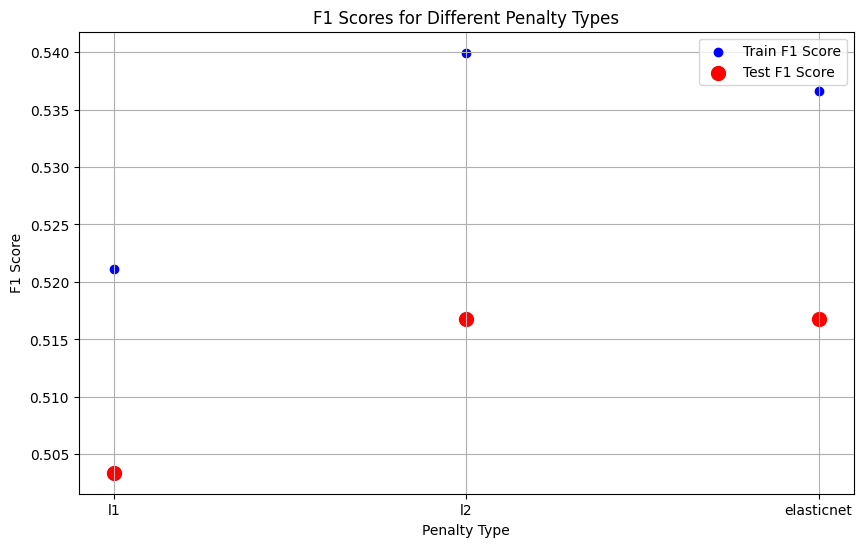

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Create a synthetic Titanic-like dataset
np.random.seed(42)  # For reproducibility

# Sample size
n = 1000

# Generate synthetic data
data = {
    'PassengerId': np.arange(1, n+1),
    'Pclass': np.random.choice([1, 2, 3], size=n),
    'Sex': np.random.choice(['male', 'female'], size=n),
    'Age': np.random.randint(1, 80, size=n),
    'SibSp': np.random.randint(0, 5, size=n),
    'Parch': np.random.randint(0, 5, size=n),
    'Fare': np.random.uniform(10, 500, size=n),
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=n),
    'Survived': np.random.choice([0, 1], size=n)
}

df = pd.DataFrame(data)

# Data wrangling
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Age'].fillna(df['Age'].median(), inplace=True)

# Features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store results
penalties = ['l1', 'l2', 'elasticnet']
f1_scores_train = []
f1_scores_test = []

# Use 'saga' solver for all penalties
for penalty in penalties:
    # Initialize the logistic regression model with appropriate solver and increased max_iter
    if penalty == 'elasticnet':
        model = LogisticRegression(penalty=penalty, solver='saga', max_iter=2000, l1_ratio=0.5)
    elif penalty == 'none':
        model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=2000)  # Use 'lbfgs' or other solvers that support no penalty
    else:
        model = LogisticRegression(penalty=penalty, solver='liblinear', max_iter=2000)  # Use 'liblinear' for L1 and L2

    # Fit the model to the training data # This line is added
    model.fit(X_train_scaled, y_train)

    # Predict and compute F1 scores
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Plot F1 scores
plt.figure(figsize=(10, 6))
plt.scatter(penalties, f1_scores_train, color='blue', label='Train F1 Score',)
plt.scatter(penalties, f1_scores_test, color='red', label='Test F1 Score', s=100)
plt.xlabel('Penalty Type')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Penalty Types')
plt.legend()
plt.grid(True)
plt.show()
